In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd 
import os
from src.nn.nn_dataset import DataSampler
from src.functions import *
from src.nn.nn_actions import NeuralNetworkActions
from src.nn.nn_inference import *

%load_ext autoreload
%autoreload 2

from omegaconf import OmegaConf
import wandb


In [65]:


cfg = OmegaConf.load("src/conf/setup_dataset_nn.yaml")
data_network = NeuralNetworkActions(cfg)
device = data_network.device
input_dim = data_network.data_loader.input_dim
print("The total number of test trajectories is: ", int(len(data_network.data_loader.x_test) / data_network.data_loader.sample_per_traj))
output_dim = input_dim - 1 
sample_per_traj = 1000
starting_traj = 1
total_traj = 200
x_test = data_network.data_loader.x_test[starting_traj*sample_per_traj:(starting_traj+total_traj)*sample_per_traj].clone().detach().to(data_network.device).requires_grad_(True)
y_test = data_network.data_loader.y_test[starting_traj*sample_per_traj:(starting_traj+total_traj)*sample_per_traj].clone().detach().to(data_network.device)
print("The current test will contain ",  int(len(x_test) / data_network.data_loader.sample_per_traj), " trajectories")
x_test_copu = x_test.clone().detach().to(data_network.device)

Loading data from:  data\SM/dataset_v13.pkl
Number of training samples:  400000 Number of validation samples:  50000 Number of testing samples:  50000
Number of different initial conditions for collocation points:  500
[[-2, 2], [-0.2, 0.2], [0], [0.9, 1.1]] Set of values for init conditions
[10, 10, 1, 5] Iterations per value
src/conf/params\system1.yaml
The total number of test trajectories is:  50
The current test will contain  49  trajectories


In [17]:
x_train = data_network.data_loader.x_train.clone().detach().to(data_network.device).requires_grad_(True)

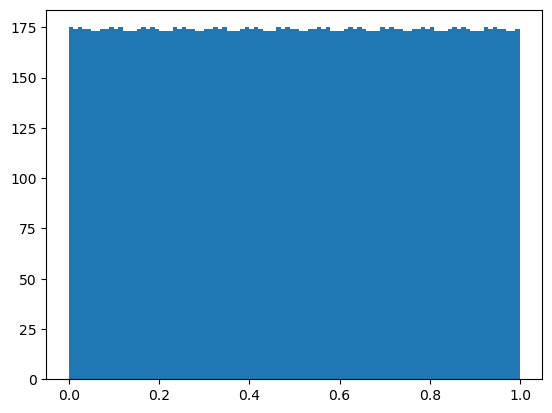

In [29]:
x_trainz_step = x_train[::23].clone().detach().to(data_network.device).requires_grad_(True)
x_trainz_step.shape

# make a histogram of the x_trainz_step[:,0] values

plt.hist(x_trainz_step[:,0].cpu().detach().numpy(), bins=100)
plt.show()

['pinn\\SMDynamicNN_1_430_17392_83334_12500_None_None_1_0.0001_1e-05_0_Sam.pth']
time 0.0017781257629394531


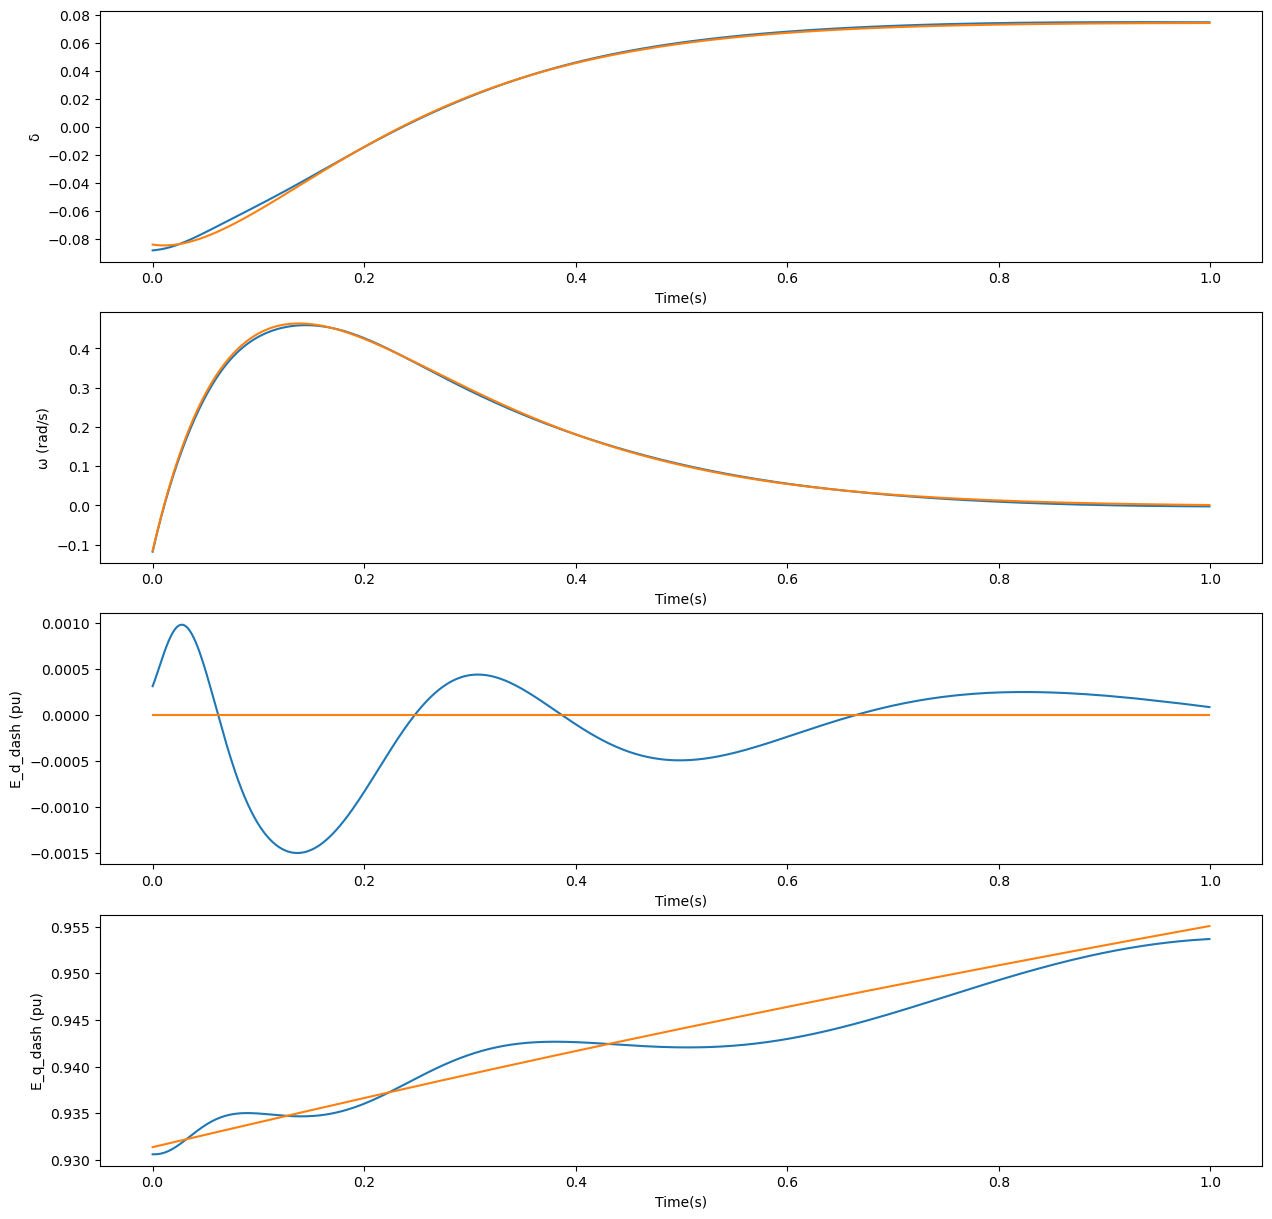

'\nfor i in range(y_pred.shape[1]):\n    plt.plot(y_pred.cpu().detach().numpy()[:num_of_points,i], label = "Prediction")\n    plt.plot(y_test[:num_of_points].cpu().detach().numpy()[:,i], label = "True")\n    plt.legend()\n    plt.show()\n'

In [67]:
import time



# find all the files in the directory model\data
folders = ["pinn"]
files = find_files(cfg, folders)
list_of_preds = []
rmse = []
mae = []
print(files)
num = 0
#x_test = x_test_copu[num:num+10000]
#y_test = y_test[num:num+10000]
for name in files:
    if check_transform(name):
        pass
    elif check_sm_modelling(name, cfg):
        pass
    else:
        
        cfg.nn.type = define_model_from_name(name)  
        model = define_nn_model(cfg, input_dim, output_dim)
        model.to(device)
        #print(name)
        load_model(model, cfg, name)
        start = time.time()
        num_of_points = 1000
        y_pred = forward_pass(model, data_network, x_test[:num_of_points] )
        end = time.time()
        #rmse.append(data_network.criterion(y_pred, y_test[:1000]).item())
        #mae.append(data_network.criterion_mae(y_pred, y_test[:1000]).item())
        #list_of_preds.append(y_pred)
        print("time",end-start)


#create a plot that contains 4 subplots , 2 in each row
plt.figure(figsize=(15, 15))
#plt.suptitle("Comparison of the Prediction and the True Values for a Single Trajectory", fontsize=16)
#put title for all the plots
plt.subplot(4, 1, 1)
#use time x_test[:,0] for the x-axis and the prediction and actual for y axi
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_pred.cpu().detach().numpy()[:num_of_points,0], label = "Prediction")
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_test[:num_of_points].cpu().detach().numpy()[:,0], label = "True")
plt.xlabel("Time(s)")
plt.ylabel("δ")
#plt.legend()
plt.subplot(4, 1, 2)
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_pred.cpu().detach().numpy()[:num_of_points,1], label = "Prediction")
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_test[:num_of_points].cpu().detach().numpy()[:,1], label = "True")
plt.xlabel("Time(s)")
plt.ylabel("ω (rad/s)")
#plt.legend()
plt.subplot(4, 1, 3)
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_pred.cpu().detach().numpy()[:num_of_points,2], label = "Prediction")
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_test[:num_of_points].cpu().detach().numpy()[:,2], label = "True")
plt.xlabel("Time(s)")
plt.ylabel("E_d_dash (pu)")
#plt.legend()
plt.subplot(4, 1, 4)
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_pred.cpu().detach().numpy()[:num_of_points,3], label = "Prediction")
plt.plot(x_test[:num_of_points].cpu().detach().numpy()[:,0],y_test[:num_of_points].cpu().detach().numpy()[:,3], label = "True")
plt.xlabel("Time(s)")
plt.ylabel("E_q_dash (pu)")
#plt.legend()
plt.show()
"""
for i in range(y_pred.shape[1]):
    plt.plot(y_pred.cpu().detach().numpy()[:num_of_points,i], label = "Prediction")
    plt.plot(y_test[:num_of_points].cpu().detach().numpy()[:,i], label = "True")
    plt.legend()
    plt.show()
"""

In [155]:
# define dataloader_minus and dataloader_divide from txt file

import time



# find all the files in the directory model\data
folders = ["pinn"]
files = find_files(cfg, folders)
list_of_preds = []
rmse = []
mae = []
print(files)
for name in files:
    if check_transform(name):
        pass
    elif check_sm_modelling(name, cfg):
        pass
    else:
        
        cfg.nn.type = define_model_from_name(name)  
        model = define_nn_model(cfg, input_dim, output_dim)
        model.to(device)
        #print(name)
        load_model(model, cfg, name)
        start = time.time()
        y_pred = forward_pass(model, data_network, x_test[:1000] )
        end = time.time()
        rmse.append(data_network.criterion(y_pred, y_test[:1000]).item())
        mae.append(data_network.criterion_mae(y_pred, y_test[:1000]).item())
        list_of_preds.append(y_pred)
        print("time",end-start)
        
#check if MinMax or Std or MinMax2 is in the name

def find_min_loss(loss_list,name):
    min_loss = min(loss_list)
    min_index = loss_list.index(min_loss)
    min_name = name[min_index]
    print(min_loss)
    print(min_name)
    return 

def sort_by_loss(loss_list,name):
    sorted_losses = sorted(loss_list)
    sorted_names = [x for _,x in sorted(zip(loss_list,name))]

    return sorted_losses, sorted_names

find_min_loss(rmse,files)
find_min_loss(mae,files)


sorted_losses, sorted_names = sort_by_loss(rmse,files)
#print(sorted_names)
#print(sorted_losses)
end = time.time()


['pinn\\SMDynamicNN_1_430_17392_83334_12500_None_None_1_0.0001_1e-05_0_Sam.pth']
time 0.0030670166015625
0.033403389155864716
pinn\SMDynamicNN_1_430_17392_83334_12500_None_None_1_0.0001_1e-05_0_Sam.pth
0.12016434967517853
pinn\SMDynamicNN_1_430_17392_83334_12500_None_None_1_0.0001_1e-05_0_Sam.pth


In [118]:

unique_values = torch.unique(x_test[:,0])
# for each unique value, plot the prediction and the true value

mae = []
rmse = []
for value in unique_values:
    index = torch.where(x_test[:,0] == value)
    # calculate the mae and rmse for each value
    y_pred_ = list_of_preds[0][index]
    y_true = y_test[index]
    mae_var = []
    rmse_var = []
    for i in range(y_pred_.shape[1]):
        mae_var.append(data_network.criterion_mae(y_pred_[i], y_true[i]).item())
        rmse_var.append(data_network.criterion(y_pred_[i], y_true[i]).item())
    mae.append((mae_var))
    rmse.append((rmse_var))
mae = np.array(mae)
rmse = np.array(rmse)



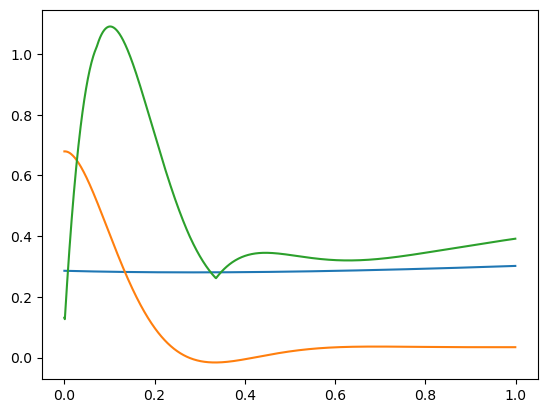

In [93]:
len(mae)

# from the list mae that has 1000 elements, and each element has 4 elements, I want to get the plot of only one element of the 4 elements

mae = np.array(mae)
rmse = np.array(rmse)

mae.shape

var = 0
plt.plot(unique_values.detach().cpu().numpy(),y_pred[:1000,var].detach().cpu().numpy())
plt.plot(unique_values.detach().cpu().numpy(),y_test[:1000,var].detach().cpu().numpy())
plt.plot(unique_values.detach().cpu().numpy(),mae[:,var])

In [85]:
y_pred.shape

torch.Size([49, 4])

In [ ]:
files[0]

# split this text 'data_dt\\GiannisSMDynamicNN_10000_19802_133334_16667_1_0.0001_0.pth' to get the parameters
# first split by \\ and then by _
split = [files[0].split("\\")[-1]]
# split by _
splitn = split[0].split("_")
# name = f"{self.cfg.model.model_flag}{self.cfg.nn.type}_{self.cfg.time}_{epoch+1}_{self.training_shape}_{self.training_col_shape}_{self.validation_shape}_{self.cfg.dataset.transform_input}_{self.cfg.dataset.transform_output}_{weight_data}_{weight_dt}_{weight_pinn}_{self.cfg.nn.update_weight_method}.pth"

# create a mapping for the parameters
mapping = {
    "model_flag": splitn[0],
    "nn_type": splitn[1],
    "time": splitn[2],
    "epoch": splitn[3],
    "training_shape": splitn[4],
    "training_col_shape": splitn[5],
    "validation_shape": splitn[6],
    "transform_input": splitn[7],
    "transform_output": splitn[8],
    "weight_data": splitn[9],
    "weight_dt": splitn[10],
    "weight_pinn": splitn[11],
    "update_weight_method": splitn[12]
}
mapping